# KNN y Clasificación

En esta clase vamos a aprender sobre K-nearest neighbors, una herramienta de clasificación. Además, vamos a aprender cómo medir el desempeño de un modelo clasificador. 

- Clasificación binaria
- Medidas de desempeño
- Clasificación multiclase

## KNN

Vamos a empezar entendiendo que pasa con KNN y los helados. 

In [1]:
import pandas as pd
helados = pd.read_csv('Ice_cream.csv')
helados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  200 non-null    int64
 1   id          200 non-null    int64
 2   female      200 non-null    int64
 3   ice_cream   200 non-null    int64
 4   video       200 non-null    int64
 5   puzzle      200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [2]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(helados[['video','puzzle']], helados['ice_cream'])

KNeighborsClassifier(n_neighbors=3)

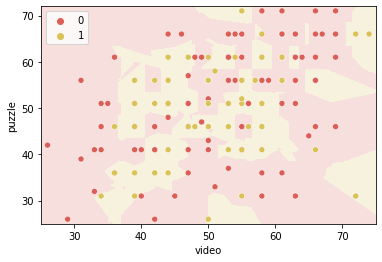

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

palette = sns.color_palette("hls", 8)
# Pasamos la paleta a Hexadecimal
# Para el fondo necesitamos que sea un Colormap
palete_hex = palette.as_hex()
palette_back = ListedColormap(palete_hex[0:2])

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = helados.video.min() - 1, helados.video.max() + 1
y_min, y_max = helados.puzzle.min() - 1, helados.puzzle.max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Generamos las predicciones
predictions = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = predictions.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=palette_back, shading='auto', alpha=0.2)
plt.xlabel('video')
plt.ylabel('puzzle')

sns.scatterplot(data=helados, x="video", y="puzzle", hue="ice_cream", palette=palette[0:2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()


Nada que ver con la regresión, este modelo es cualqier cosa menos lineal. Para este dataset en particular, parece ser que KNN es mucho mejor. Veamos el log-loss, va a dar mucho más bajo que con la regresión. 

In [5]:
from sklearn.metrics import log_loss

predictions = neigh.predict(helados[['video','puzzle']])
log_loss(helados['ice_cream'],predictions)

8.462076178508987

Hemos visto sobre el log loss, pero hay medidas mejores. La primera: por qué no contamos simplemente a cuanto le achuntamos y cuanto no?

Evidentemente, esto hace más sentido en un entorno de cross validation. 

Vamos a entrenar dos clasificadores: KNN usando **video** y **puzzle** y otro que agregue **female**.  

In [6]:
neigh_pv = KNeighborsClassifier(n_neighbors=3)
neigh_pv.fit(helados[['video','puzzle']], helados['ice_cream'])

neigh_pvf = KNeighborsClassifier(n_neighbors=10)
neigh_pvf.fit(helados[['female','video','puzzle']], helados['ice_cream'])

KNeighborsClassifier(n_neighbors=10)

Ahora usamos una función que nos hace el cross-validation de forma automatica. El scoring que pedimos es accuracy. 

> Accuracy: # de entidades bien clasificadas / # de datos totales

In [7]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(neigh_pv, helados[['video','puzzle']], helados['ice_cream'], cv=3, scoring='accuracy'))

print(cross_val_score(neigh_pvf, helados[['female','video','puzzle']], helados['ice_cream'], cv=3, scoring='accuracy'))

[0.49253731 0.53731343 0.48484848]
[0.55223881 0.49253731 0.54545455]


## Ejercicio: experimenta con distintos valores de k para KNN, ¿qué pasa con el accuracy?

# Medidas de desempeño para clasificadores binarios: Precision, Recall, matriz de confusión

Para mostrar empíricamente qué pasa con el accuracy y por qué es necesario considerar mejores medidas, nos vamos a pasar a un dataset más complejo. 

Este dataset tiene miles de ejemplos de scans de números escritos a mano (son 784 pixeles). La tarea es clasificar los números. 



In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [53]:
import pandas as pd
X = mnist['data'] 
y = mnist['target']

# Vamos a trabajar con datos mas chicos
X, y = X[:60000], y[:60000]

In [38]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int32

Para trabajar primero con clasificación binaria, vamos a cambiar el y por un arreglo que tenga true cuando es un 7 y false cuando no. 


In [68]:
y = y.astype(int)
y_7 = (y == 7)
y_7

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [69]:
import numpy as np
from sklearn.linear_model import SGDClassifier


neigh_numbers = KNeighborsClassifier(n_neighbors=3)
#neigh_numbers.fit(X, y_7)

cross_val_score(neigh_numbers, X, y_7, cv=3, scoring='accuracy')


array([0.99435, 0.9922 , 0.99295])

 El valor es muy alto, ¡deberíamos estar felices!, pero ¿esta es realmente una buena medida para entender nuestro modelo? Vamos a discutir esto en la siguiente sección.

## Medidas de desempeño

Vamos a hacer un ejercicio bastante sencillo. Vamos a hacer un clasificador que siempre nos diga que **no estamos viendo un 7** y vamos a medir su desempeño.

In [70]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

En el ejemplo anterior estamos definiendo nuestro propio modelo, que contesta `False` siempre. Vemos además que es muy fácil hacer nuestros propios clasificadores. 

Ahora bien, antes de continuar, ¿puedes adivinar el desempeño que va a tener este clasificador?

In [71]:
n7_clf = Never7Classifier()
cross_val_score(n7_clf, X, y_7, cv=3, scoring='accuracy')

array([0.89535, 0.8984 , 0.893  ])

Así es, cerca de 90% para un muy mal clasificador. Esto no nos sorprende, porque cerca del 10% de los elementos del dataset son un 7. Esto nos muestra por qué _Accuracy_ no es una buena medida de desempeño, especialmente cuando algunas clases aparecen poco: un clasificador que nunca prediga esas clases se debería comportar siempre relativamente bien. Por lo mismo, vamos a medir el desempeño de una mucho mejor forma: la matriz de confusión (_Confusion Matrix_).

### Matriz de confusión

En una matriz de confusión tenemos una fila que representa la clase que estamos analizando y una columna para cada clase predicha para las instancias de la fila. Veamos cómo se ve en nuestro ejemplo.

In [72]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict nos retorna la clase predicha para cada instancia
# en vez de agrupar todo en un puntaje. Notar que cada instancia pertenece solo a un split de test, 
# la instancia predicha es la instancia predicha para la instancia cuando es parte del split de test. 
ypred = cross_val_predict(neigh_numbers, X, y_7, cv=3)

Vamos ahora por la matriz de confusión.

In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_7, ypred)

array([[53500,   235],
       [  175,  6090]], dtype=int64)

Recordemos que la clase 0 significa "no es 7", y la clase 1 significa "es un 7". Así que la fila 0 nos dice que 53500 instancias que tenían la clase 0, fueron clasificadas como clase 0, mientras que 235 instancias de clase 0 fueron clasificadas como clase 1. Mientras tanto, la fila 1 nos dice que 175 instancias que eran de la clase 1 fueron clasificadas como clase 0 y 6090 instancias de clase 1 fueron clasificadas correctamente. Vamos ahora cómo se comporta nuestro clasificador que siempre responde falso.

In [75]:
y_pred = cross_val_predict(n7_clf, X, y_7, cv=3)
confusion_matrix(y_7, y_pred)

array([[53735,     0],
       [ 6265,     0]], dtype=int64)

Como es de esperar, acerto en todos las instancias que no son 7, y se equivocó en todas las que son 7. Así, un clasificador perfecto tiene números  solamente en la diagonal, y en todos los demás casilleros hay 0s. Gracias a la matriz de confusión, tenemos una medida objetiva de que este modelo es malo, a pesar de su buen _accuracy_.

### _Precision_ y _Recall_

Si bien la matriz de confusión nos entrega varios valores (si tenemos más clases son muchas más filas y columnas!) a veces queremos algo más concreto. Dos medidas bastante famosas son _Precision_ y _Recall_. Vamos a presentarlas a continuación.


$$
\text{precision} = \frac{TP}{TP + FP}
$$

$$
\text{recall} = \frac{TP}{TP + FN}
$$

En donde $TP$ son los verdaderos positivos (_True Possitive_), $FP$ son los falsos positivos (_False Possitives_) y $FN$ los falsos negativos (_False Negatives_).

¿Por qué necesitamos dos valores? La respuesta la podemos entender con el siguiente ejemplo: supón que tenemos un modelo que solamente clasifica un elemento de forma correcta, pero está muy seguro de lo que hace. Así, los falsos positivos serán 0 y la precisión será $1/1$, que equivale al 100%. Así podemos entender la precisión como **cuando digo que algo es de una clase, qué porcentaje de las veces estoy en lo correcto** y el _recall_ como **de los positivos que existen, cuantos estoy detectando**. Veamos esta medida en nuestro clasificador de 7s.

In [76]:
from sklearn.metrics import precision_score, recall_score

y_pred = cross_val_predict(neigh_numbers, X, y_7, cv=3)
precision_score(y_7, y_pred)

0.9628458498023715

In [77]:
recall_score(y_7, y_pred)

0.9720670391061452

Así, vemos que nuestro clasificador no está "realmente seguro" cuando dice que algo es un 7, mientras que sí detecta la mayoría de los 7. También existe otro puntaje en el que no vamos a hacer énfasis, pero es el $F_1$ _score_, que es la media armónica entre _Precision_ y _Recall_:

$$
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

Que es una medida que beneficia a modelos con precisión y _recall_ similares. Pero a veces queremos modelos que beneficien la precisión o el _recall_. Pensemos en los siguientes casos:

- Queremos hacer un modelo que nos diga si ciertos medicamentos son seguros para la salud. Aquí nos interesa estar realmente seguros de si un medicamento es clasificado como seguro (positivo), a pesar de que podamos tener muchos falsos negativos. Aquí queremos altra precisión, a un costo de bajo _recall_.
- Queremos hacer un modelo que recomiende canciones a alguien. Quizás no nos importa equivocarnos a cambio de que todas las posibles canciones que le gustan a la persona sean recomendadas. Aquí tendremos varios falsos positivos, por lo que habrá una baja precisión, pero tendremos un alto _recall_, porque el objetivo era tener pocos falsos negativos.

Usualmente nos encontraremos con un _trade-off_ entre precisión y _recall_.

## Ejercicio 2

Entrena un clasificador de regresión logística para este problema. 

Reproduce la matriz de confusión y compara con el clasificador de 3NN. ¿Cuál clasificador es mejor? ¿Cómo se comporta la regresión logística en cuanto a precision y recall? 


## Clasificación multiclase y KNN

Supongamos que ahora no queremos saber si algo es o no es un 7, sino que queremos saber qué número es. Con lo que sabemos hasta ahora, ¿cómo lo podemos hacer?

KNN nos da soporte natural para clasificación multiclase, y hay también modelos de regresión logística para esto. 

Veamos que pasa con un 3NN para el caso multiclase. 

In [78]:
neigh_numbers = KNeighborsClassifier(n_neighbors=3)

cross_val_score(neigh_numbers, X, y, cv=3, scoring='accuracy')

array([0.969  , 0.96805, 0.9675 ])

Estos son muy buenos puntajes, porque en este caso un clasificador _random_ tendría cerca del 10% de _accuracy_. Sin embargo, es una buena idea revisar la matriz de confusión para este escenario.

In [79]:
y_pred = cross_val_predict(neigh_numbers, X, y, cv=3)
conf_mx = confusion_matrix(y, y_pred)
conf_mx

array([[5884,    3,    3,    0,    1,    4,   18,    1,    5,    4],
       [   3, 6708,    8,    1,    2,    1,    2,   10,    3,    4],
       [  53,   56, 5706,   13,    9,    3,    8,   87,   16,    7],
       [  11,   16,   38, 5898,    1,   68,    3,   34,   39,   23],
       [   8,   59,    1,    0, 5634,    0,   12,    9,    3,  116],
       [  24,   13,    7,   80,    8, 5195,   58,    5,   10,   21],
       [  27,   13,    1,    0,    6,   18, 5850,    0,    3,    0],
       [   5,   60,   14,    3,   22,    2,    0, 6091,    2,   66],
       [  29,   76,   19,   83,   39,   97,   26,   14, 5416,   52],
       [  18,   15,    7,   39,   57,   12,    3,   80,    9, 5709]],
      dtype=int64)

Ahora bien, dado que tenemos muchos números, lo mejor es ver esto como una imagen. En esta imagen en escala de grises veremos para cada fila el número de instancias que son del número representado por esa clasificadas en cada columna. Mientras más instancias caen en un determinado casillero, más blanco el casillero. El casillero con el menor valor se lleva el color negro, y el de mayor valor el color blanco.

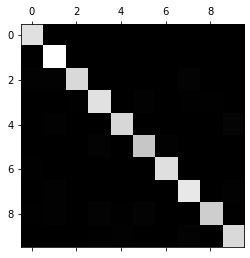

In [80]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Ahora nos queremos concentrar en los errores, así que vamos a hacer lo siguiente:

- Primero, vamos a setear en 0 la diagonal para que no nos entregue ruido.
- Segundo, vamos a normalizar cada fila. Esto es sumar los valores de cada fila, y dividir todos los elementos de esa fila por el valor. Esto se hace porque una clase muy grande se puede ver mal en comparación a otras, pero si lo miramos como _ratio_, puede no ser así.

In [56]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

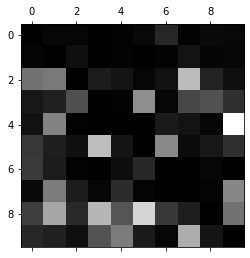

In [57]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Aquí podemos ver, por ejemplo, que hay muchos 4 que se confunden por 9. ¿Qué más puedes ver? 